### Start-up

In [1]:
%run cubes_e2e_refresh.py

In [2]:
#%matplotlib notebook

In [3]:
#%load_ext memory_profiler

### Input spectra

Sky spectrum created and saved in SkyCalc_input_NEW_Out.fits.
Photons collected.
Input spectra created; target magnitude in the U band: 20.17.
Sky spectrum imported from SkyCalc_input_NEW_Out.fits.


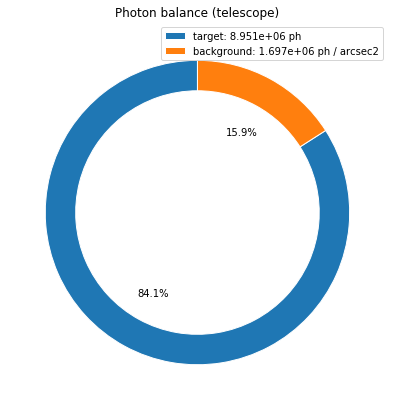

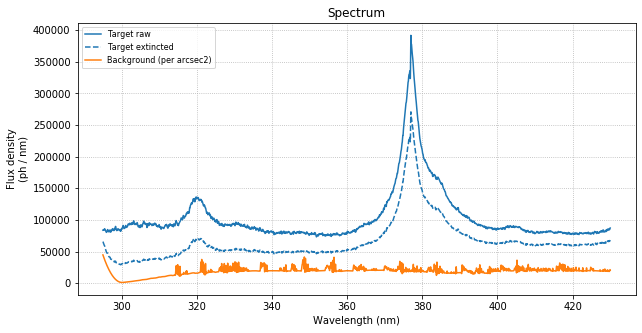

In [4]:
sim.spec_templ = 'custom'  # Template ('flat', 'PL', 'custom')
sim.spec_file = 'Science_Spectra/Zheng+97.txt'  # Path to file

sim.mag_syst = 'Vega'  # System ('Vega')
sim.mag_band = 'B'  # Band ('U', 'B', 'V', 'R', 'I', 'J', 'H', 'K' for Vega)
sim.targ_mag = 21  # Magnitude

sim.zem = 2.1  # Emission redshift
sim.igm_abs = 'inoue'  # IGM absorption

sim.airmass = 1.16  # Airmass
sim.pwv = 2.5  # Precipitable water vapor
sim.moond = 0  # Days from new moon
try:
    %run -i SkyCalc_Call.py  # Uncomment this to skip call to SkyCalc
except:
    sim.bckg_mag = 22.5 # Background magnitude
    
sim.texp = 3600*au.s  # Exposure time
sim.spec_in()
#%mprun -f sim.spec_in sim.spec_in()  # Only for memory checks

### PSF and slices

Slices designed on field.     


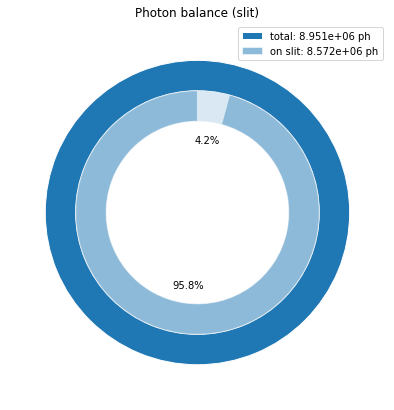

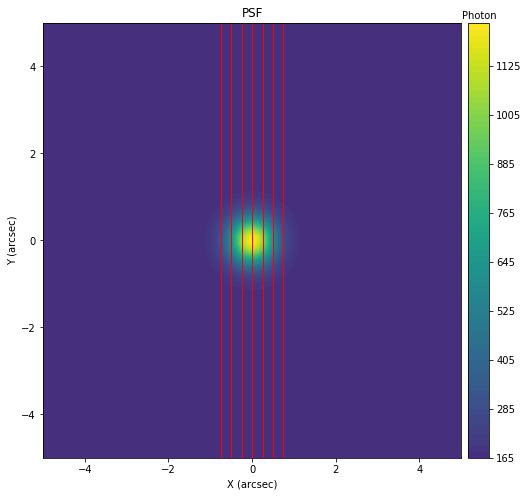

In [5]:
sim.psf_func = 'gaussian'  # Function to represent the PSF ('tophat', 'gaussian')
sim.seeing = 0.87*au.arcsec  # Seeing

sim.targ_ext = False
sim.targ_sersic_params = {'amplitude': 1, 'r_eff': 2, 'n': 4, 'x_0': 0.5, 'y_0': 0.5, 'ellip': 0.5, 'theta': 1} 

sim.slice_n = 6  # Number of slices
sim.slice_length = 10*au.arcsec  # Length of the slice
sim.slice_width = 0.25*au.arcsec  # Width of the slice
sim.psf()
#%mprun -f sim.psf sim.psf()  # Only for memory checks

### Spectral format

Slices projected onto arms.       


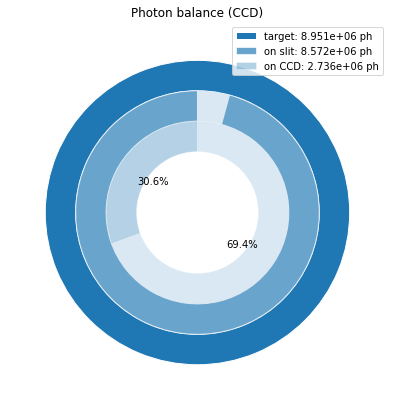

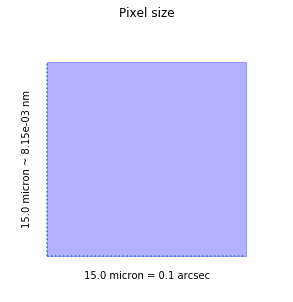

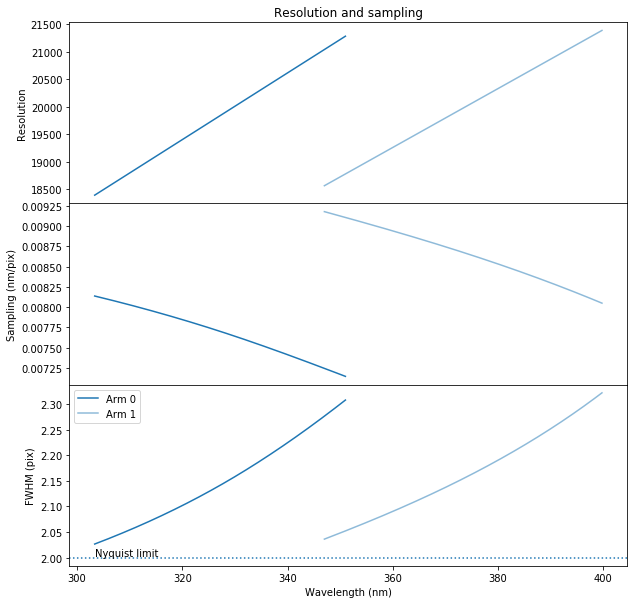

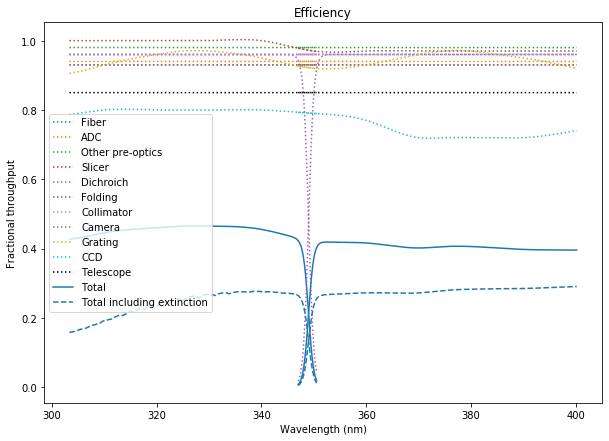

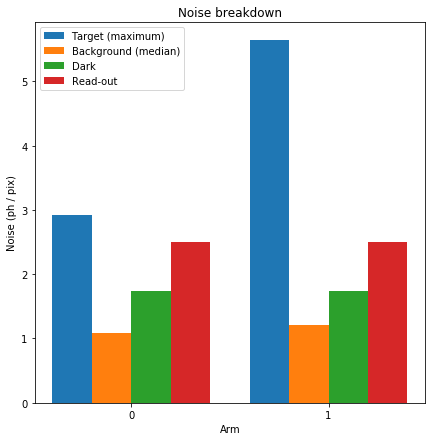

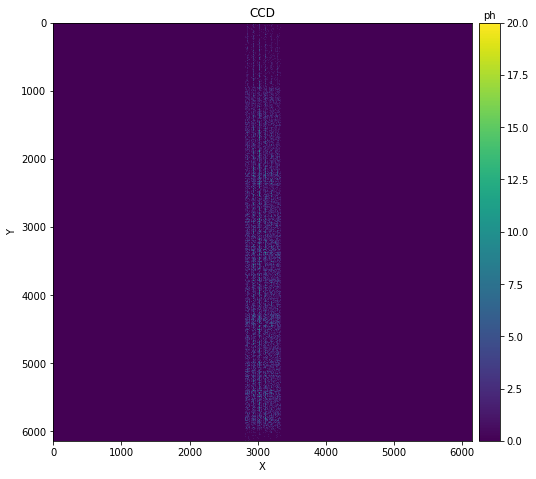

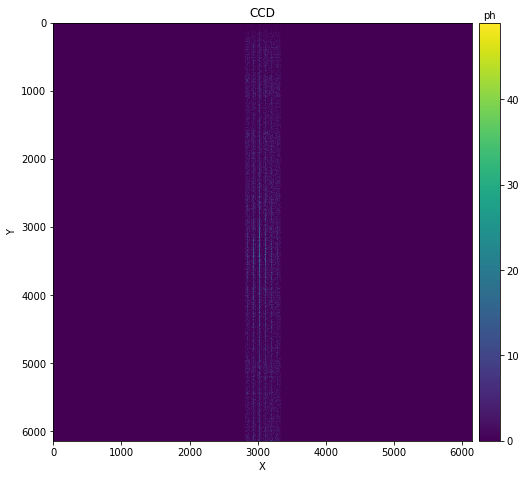

In [6]:
sim.ccd_gain = 1.1*au.photon/au.adu  # Gain (i.e. conversion from ADU to photons)
sim.ccd_ron = 2.5*au.photon / sim.ccd_gain  # Read-out noise (in ADU)
sim.ccd_dark = 3*au.photon/au.h / sim.ccd_gain  # Dark current (in ADU per unit time)
sim.ccd_xsize = 6144*au.pixel  # X size of the CCD 
sim.ccd_ysize = 6144*au.pixel  # Y size of the CCD
sim.pix_xsize = 15*au.micron  # X size of the pixels
sim.pix_ysize = 15*au.micron  # Y size of the pixels
sim.ccd_xbin = 1  # X binning of the CCD
sim.ccd_ybin = 1  # Y binning of the CCD

sim.arm_n = 2  # Number of arms
if sim.arm_n == 1:
    sim.wave_d = []*au.nm  # Wavelength of dichroich
if sim.arm_n == 2:
    sim.wave_d = [349]*au.nm  # Wavelength of dichroich
    sim.wave_d_shift = 2*au.nm  # Shift of the CCD edges w.r.t. the dichroich wavelength
if sim.arm_n == 3 and sim.ccd_ysize.value < 5000:
    sim.wave_d = [334, 364]*au.nm  # Wavelengths of dichroichs
    sim.wave_d_shift = 3*au.nm  # Shift of the CCD edges w.r.t. the dichroich wavelengths
if sim.arm_n == 3 and sim.ccd_ysize.value > 5000:
    sim.wave_d = [340, 380]*au.nm  # Wavelengths of dichroichs
    sim.wave_d_shift = 5*au.nm  # Shift of the CCD edges w.r.t. the dichroich wavelengths

sim.eff_file = 'database/EFFICIENCIES'
sim.disp_file = 'database/DISPERSION'

sim.spat_scale = 0.25*au.arcsec/(30*au.micron)  # Spatial scale

sim.slice_gap = 8*au.pixel  # Gap between the slices
sim.ccd()
#%mprun -f sim.ccd sim.ccd()  # Only for memory checks

### Output spectrum

SNR across arm 0:               
 305.68 nm:   5
 317.17 nm:   6
 328.65 nm:   7
 340.14 nm:   6
 351.63 nm:   0
SNR across arm 1:               
 346.37 nm:  -0
 359.52 nm:   8
 372.68 nm:  11
 385.83 nm:  11
 398.99 nm:   4


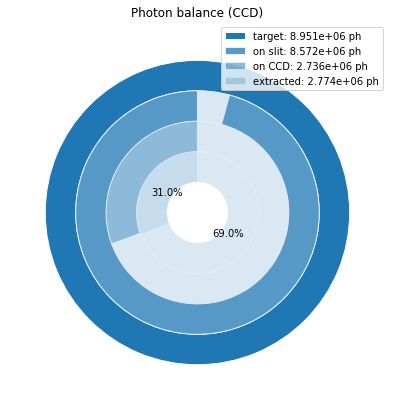

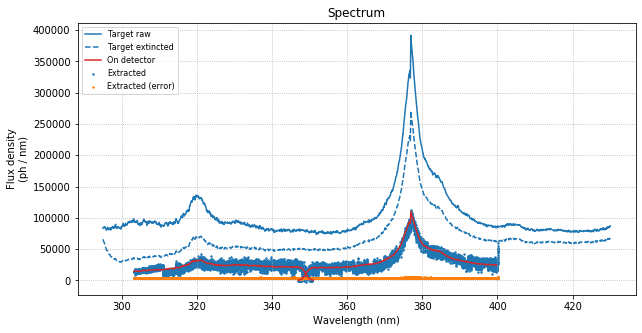

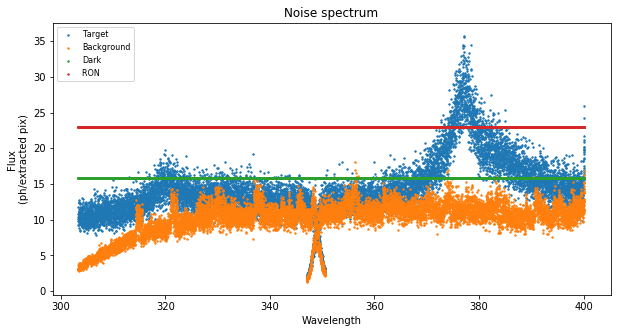

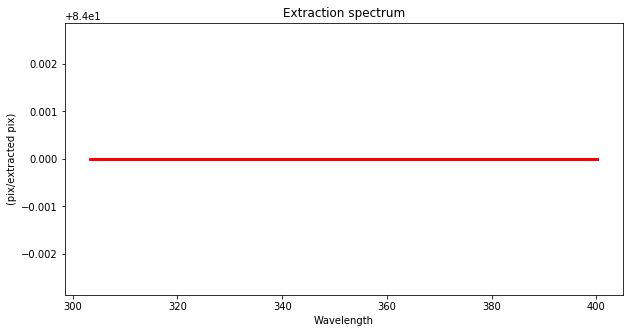

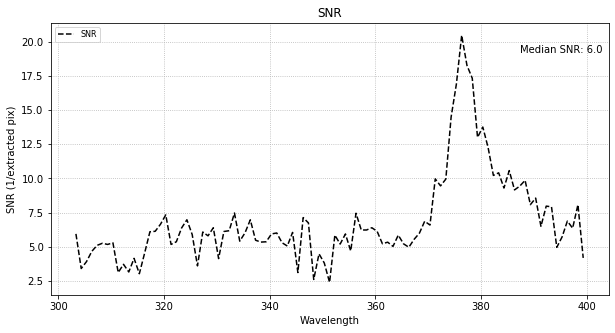

In [7]:
sim.extr_func = 'sum'  # Function for extracting the spectrum ('sum', 'opt' [very slow and not well tested])

sim.snr_sampl = 1*au.nm  # Data points per SNR point

sim.spec_draw()
#%mprun -f sim.spec_draw sim.spec_draw()  # Only for memory checks